# Automated model comparison <a class="anchor" id="chapter2"></a>


* [1. Classification of time series models](#chapter1)
* [2. Statistical models](#chapter2)


Once the benchmark point has been established via a baseline model, a set of models to be fitted is considered. If you are not sure which model to choose to fit your data, a quick way to try out different models and evaluate them is to use [PyCaret](https://pycaret.org/). This library allows you to <span style="color:green">quickly fit and evaluate a set of models using very little code</span>. 

## Classification of time series models <a class="anchor" id="chapter1"></a>
Time series models can be classified into the following categories:

- **Statistical models:** Exponential smoothing, ARIMA, TBATS
- **Machine learning regression based methods:** Linear regression, XGBoost, Random Forest, etc.
- **Deep learning techniques:** Recurrent Neural Networks (RNN, LSTM, GRU).

<span style="color:red">REMEMBER</span>: traditional regression models and techniques are not suitable for time series problems (cross-validation, hypotheses, etc. do not take into account time order). When applying ML models in regression it is important to <span style="color:red">verify that the setup respects the order of the observations</span>.

# Statistical models <a class="anchor" id="chapter2"></a>

[PyCaret](https://pycaret.org/) offers datasets to load for experimentation through the function [pycaret.datasets.get_data](https://pycaret.readthedocs.io/en/stable/api/datasets.html). 

In [1]:
# initialize setup
from pycaret.time_series import TSForecastingExperiment

# load data
from pycaret.datasets import get_data

# plotting
import matplotlib.pyplot as plt
from sktime.utils.plotting import plot_series

In this notebook the series studied is the one previously seen: the airline series. This is a univariate series with no exogenous variables.

In [2]:
# data loading
data = get_data('airline', verbose=False)
# show the first 5 rows
data.head()

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

## Exploratory Data Analysis 

The first step is always to visualize the series. To do this and extract useful information from the data, a TSForecastingExperiment object is instantiated and initialized below.

Once the object has been initialised, read the information obtained from the graphic and check that it makes sense. 

The forecasting horizon ($\text{fh}$) must be set. Suppose you want to predict the next year, i.e. the next 12 months: $\text{fh}=12$.

In [3]:
# fix the forecasting horizon
fh = 12

In [4]:
eda = TSForecastingExperiment() # create object 
eda.setup(data=data, fh=fh, fold=5, session_id=123) # setup experiment

,Description,Value
0,session_id,123
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [5]:
eda.plot_model()

From the table above

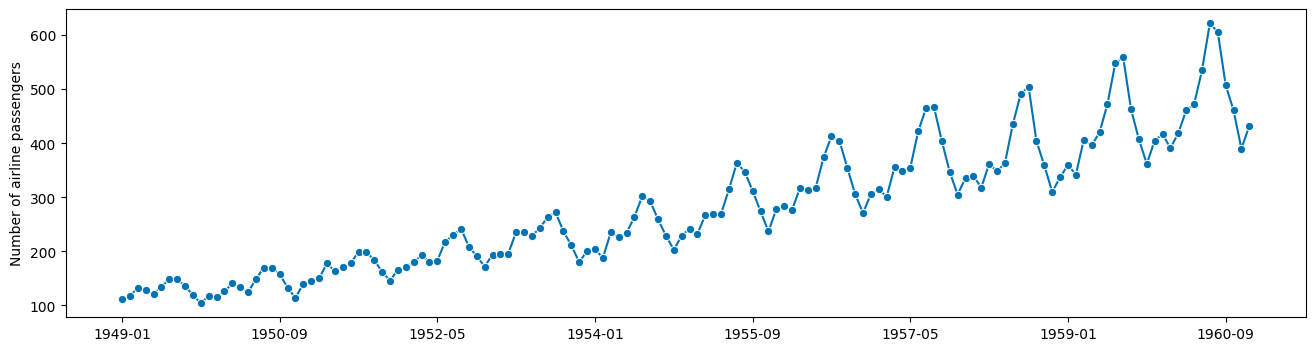

In [15]:
# represent series and show
plot_series(data)
plt.show()

From the graph one can easily see:

1. An upward **trend**.
2. A **seasonal pattern** of period **12** (the series peaks every 12 months). 
3. The seasonality is **multiplicative**, as the magnitude of the seasonal change increases with time. 

In [16]:
exp = TimeSeriesExperiment()
exp.setup(data=data,session_id=42,fh=12)

,Description,Value
0,session_id,42
1,Original Data,"(144, 1)"
2,Missing Values,False
3,Transformed Train Set,"(132,)"
4,Transformed Test Set,"(12,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,CPU Jobs,-1
8,Use GPU,False
9,Log Experiment,False


In [17]:
exp.compare_models(sort='mae')

IntProgress(value=0, description='Processing: ', max=134)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:03:32
Status,. . . . . . . . . . . . . . . . . .,Fitting 3 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Naive Forecaster


,Model,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)


In [ ]:
# Create a model manually
model = exp.create_model("ets")
model

## Machine learning regression based models